In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("historical_air_quality_2021_en.csv")

**Clean data**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station ID          2622 non-null   float64
 1   AQI index           2618 non-null   object 
 2   Location            2622 non-null   object 
 3   Station name        2622 non-null   object 
 4   Url                 2622 non-null   object 
 5   Dominent pollutant  2114 non-null   object 
 6   CO                  2615 non-null   object 
 7   Dew                 2263 non-null   float64
 8   Humidity            2608 non-null   float64
 9   NO2                 2615 non-null   object 
 10  O3                  2608 non-null   object 
 11  Pressure            2608 non-null   object 
 12  PM10                2583 non-null   object 
 13  PM2.5               2614 non-null   object 
 14  SO2                 2614 non-null   object 
 15  Temperature         2615 non-null   float64
 16  Wind  

In [4]:
df.rename(columns={"Station ID":"StationID"},inplace = True)
df.rename(columns={"Station name":"StationName"},inplace = True)
df.rename(columns={"Dominent pollutant":"DominentPollutant"},inplace = True)
df.rename(columns={"Data Time Tz":"DataTimeTz"},inplace = True)
df.rename(columns={"Data Time S":"DataTimeS"},inplace = True)
df.rename(columns={"AQI index":"AQI"},inplace = True)
df.rename(columns={"Alert level":"AlertLevel"},inplace = True)


In [5]:
df.replace('-', np.nan, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StationID          2622 non-null   float64
 1   AQI                2101 non-null   object 
 2   Location           2622 non-null   object 
 3   StationName        2622 non-null   object 
 4   Url                2622 non-null   object 
 5   DominentPollutant  2114 non-null   object 
 6   CO                 2155 non-null   object 
 7   Dew                2263 non-null   float64
 8   Humidity           2608 non-null   float64
 9   NO2                1992 non-null   object 
 10  O3                 1227 non-null   object 
 11  Pressure           2608 non-null   object 
 12  PM10               1888 non-null   object 
 13  PM2.5              2184 non-null   object 
 14  SO2                1261 non-null   object 
 15  Temperature        2615 non-null   float64
 16  Wind               2615 

In [7]:
#df.drop(['Url','Status','Location','DataTimeTz','O3','NO2','SO2','CO'],axis ='columns',inplace = True)

In [8]:
tphcm=df[df.StationID == 8767.0]
tphcm.head()


,StationID,AQI,Location,StationName,Url,DominentPollutant,CO,Dew,Humidity,NO2,...,Pressure,PM10,PM2.5,SO2,Temperature,Wind,DataTimeS,DataTimeTz,Status,AlertLevel
0,8767.0,102.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,NaN,NaN,83.0,NaN,...,"1,009.00",NaN,102.00,NaN,27.0,3.6,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
23,8767.0,122.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,NaN,NaN,56.5,NaN,...,"1,008.50",NaN,122.00,NaN,30.5,2.5,2021-01-22 13:00:00,+07:00,#NAME?,#NAME?
46,8767.0,114.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,NaN,NaN,49.0,NaN,...,"1,007.00",NaN,114.00,NaN,32.0,1.5,2021-01-23 15:00:00,+07:00,#NAME?,#NAME?
69,8767.0,80.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,NaN,NaN,74.0,NaN,...,"1,009.00",NaN,80.00,NaN,27.0,4.1,2021-01-25 19:00:00,+07:00,#NAME?,#NAME?
92,8767.0,137.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,NaN,NaN,62.0,NaN,...,"1,007.00",NaN,137.00,NaN,31.0,5.1,2021-01-26 16:00:00,+07:00,#NAME?,#NAME?


In [9]:
tphcm.groupby(['DominentPollutant']).count()
#tphcm.groupby(['PM10']).count()

,StationID,AQI,Location,StationName,Url,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind,DataTimeS,DataTimeTz,Status,AlertLevel
DominentPollutant,,,,,,,,,,,,,,,,,,,,
pm25,114,114,114,114,114,0,99,114,0,0,114,0,114,0,114,114,114,114,114,114


In [10]:
new_tphcm = tphcm.drop(['DominentPollutant','PM10','StationName','StationID','PM2.5','Url','Status','Location','DataTimeTz','O3','NO2','SO2','CO'],axis=1)
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.00,NaN,83.0,"1,009.00",27.0,3.6,2021-01-21 19:00:00,#NAME?
23,122.00,NaN,56.5,"1,008.50",30.5,2.5,2021-01-22 13:00:00,#NAME?
46,114.00,NaN,49.0,"1,007.00",32.0,1.5,2021-01-23 15:00:00,#NAME?
69,80.00,NaN,74.0,"1,009.00",27.0,4.1,2021-01-25 19:00:00,#NAME?
92,137.00,NaN,62.0,"1,007.00",31.0,5.1,2021-01-26 16:00:00,#NAME?
...,...,...,...,...,...,...,...,...
2507,97.00,24.0,66.0,"1,010.00",31.0,2.8,2021-11-10 10:00:00,#NAME?
2530,65.00,24.0,66.0,"1,008.50",31.0,3.6,2021-11-16 12:00:00,#NAME?
2553,114.00,25.0,79.0,"1,009.00",29.0,1.5,2021-11-20 09:00:00,#NAME?
2576,89.00,20.5,69.0,"1,011.00",26.5,3.0,2021-11-26 09:00:00,#NAME?


In [11]:
new_tphcm.drop_duplicates(inplace=True)
new_tphcm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AQI          112 non-null    object 
 1   Dew          97 non-null     float64
 2   Humidity     112 non-null    float64
 3   Pressure     112 non-null    object 
 4   Temperature  112 non-null    float64
 5   Wind         112 non-null    float64
 6   DataTimeS    112 non-null    object 
 7   AlertLevel   112 non-null    object 
dtypes: float64(4), object(4)
memory usage: 7.9+ KB


In [12]:
new_tphcm.reset_index(drop=True, inplace=True)
# drop true : tránh chỉ mục cũ được thêm vào 1 cột
new_tphcm.head(20)

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.00,NaN,83.0,"1,009.00",27.0,3.6,2021-01-21 19:00:00,#NAME?
1,122.00,NaN,56.5,"1,008.50",30.5,2.5,2021-01-22 13:00:00,#NAME?
2,114.00,NaN,49.0,"1,007.00",32.0,1.5,2021-01-23 15:00:00,#NAME?
3,80.00,NaN,74.0,"1,009.00",27.0,4.1,2021-01-25 19:00:00,#NAME?
4,137.00,NaN,62.0,"1,007.00",31.0,5.1,2021-01-26 16:00:00,#NAME?
5,117.00,NaN,60.0,"1,007.00",30.5,4.6,2021-01-27 15:00:00,#NAME?
6,91.00,NaN,34.0,"1,009.50",32.5,2.5,2021-01-29 14:00:00,#NAME?
7,87.00,NaN,65.0,"1,012.00",26.0,2.0,2021-01-30 21:00:00,#NAME?
8,59.00,NaN,80.5,"1,012.00",25.5,1.2,2021-01-31 23:00:00,#NAME?
9,59.00,NaN,69.0,"1,012.00",25.0,1.0,2021-02-03 00:00:00,#NAME?


In [13]:
new_tphcm.Pressure=new_tphcm.Pressure.apply(lambda x :( x.replace(',','')))

In [14]:
#new_tphcm.replace(np.nan,'0',inplace=True)
#new_tphcm

In [15]:
new_tphcm= new_tphcm.astype({'AQI':'float'})
new_tphcm= new_tphcm.astype({'Pressure':'float'})
new_tphcm= new_tphcm.astype({'DataTimeS':'datetime64'})
new_tphcm= new_tphcm.astype({'Dew':'float'})
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.0,NaN,83.0,1009.0,27.0,3.6,2021-01-21 19:00:00,#NAME?
1,122.0,NaN,56.5,1008.5,30.5,2.5,2021-01-22 13:00:00,#NAME?
2,114.0,NaN,49.0,1007.0,32.0,1.5,2021-01-23 15:00:00,#NAME?
3,80.0,NaN,74.0,1009.0,27.0,4.1,2021-01-25 19:00:00,#NAME?
4,137.0,NaN,62.0,1007.0,31.0,5.1,2021-01-26 16:00:00,#NAME?
...,...,...,...,...,...,...,...,...
107,97.0,24.0,66.0,1010.0,31.0,2.8,2021-11-10 10:00:00,#NAME?
108,65.0,24.0,66.0,1008.5,31.0,3.6,2021-11-16 12:00:00,#NAME?
109,114.0,25.0,79.0,1009.0,29.0,1.5,2021-11-20 09:00:00,#NAME?
110,89.0,20.5,69.0,1011.0,26.5,3.0,2021-11-26 09:00:00,#NAME?


In [16]:
#filt = new_tphcm['Dew'] <= 0.1
#new_tphcm.loc[filt]

In [17]:
new_tphcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   AQI          112 non-null    float64       
 1   Dew          97 non-null     float64       
 2   Humidity     112 non-null    float64       
 3   Pressure     112 non-null    float64       
 4   Temperature  112 non-null    float64       
 5   Wind         112 non-null    float64       
 6   DataTimeS    112 non-null    datetime64[ns]
 7   AlertLevel   112 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.1+ KB


In [18]:
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.0,NaN,83.0,1009.0,27.0,3.6,2021-01-21 19:00:00,#NAME?
1,122.0,NaN,56.5,1008.5,30.5,2.5,2021-01-22 13:00:00,#NAME?
2,114.0,NaN,49.0,1007.0,32.0,1.5,2021-01-23 15:00:00,#NAME?
3,80.0,NaN,74.0,1009.0,27.0,4.1,2021-01-25 19:00:00,#NAME?
4,137.0,NaN,62.0,1007.0,31.0,5.1,2021-01-26 16:00:00,#NAME?
...,...,...,...,...,...,...,...,...
107,97.0,24.0,66.0,1010.0,31.0,2.8,2021-11-10 10:00:00,#NAME?
108,65.0,24.0,66.0,1008.5,31.0,3.6,2021-11-16 12:00:00,#NAME?
109,114.0,25.0,79.0,1009.0,29.0,1.5,2021-11-20 09:00:00,#NAME?
110,89.0,20.5,69.0,1011.0,26.5,3.0,2021-11-26 09:00:00,#NAME?


In [19]:

def Alert_Level(value):
    if value < 50:
        return "good"
    if 50 <= value < 100:
        return "Moderate"
    elif 100 <= value < 150:
        return "Unhealthy for Sensitive Groups"
    elif 150 <= value < 200:
        return "Unhealthy"
    elif 200 <= value < 300:
        return "Very Unhealthy"
    elif value >= 300:
        return "Hazardous"
 
new_tphcm['AlertLevel'] = new_tphcm['AQI'].map(Alert_Level)  

In [20]:
new_tphcm[['AQI', 'AlertLevel']]

,AQI,AlertLevel
0,102.0,Unhealthy for Sensitive Groups
1,122.0,Unhealthy for Sensitive Groups
2,114.0,Unhealthy for Sensitive Groups
3,80.0,Moderate
4,137.0,Unhealthy for Sensitive Groups
...,...,...
107,97.0,Moderate
108,65.0,Moderate
109,114.0,Unhealthy for Sensitive Groups
110,89.0,Moderate


In [21]:
#https://journals.ametsoc.org/view/journals/bams/86/2/bams-86-2-225.xml
new_tphcm['Dew'] = new_tphcm.apply(lambda row : (row['Temperature']-20 + row['Humidity']/5 ),axis=1)
new_tphcm.head(10)

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel
0,102.0,23.6,83.0,1009.0,27.0,3.6,2021-01-21 19:00:00,Unhealthy for Sensitive Groups
1,122.0,21.8,56.5,1008.5,30.5,2.5,2021-01-22 13:00:00,Unhealthy for Sensitive Groups
2,114.0,21.8,49.0,1007.0,32.0,1.5,2021-01-23 15:00:00,Unhealthy for Sensitive Groups
3,80.0,21.8,74.0,1009.0,27.0,4.1,2021-01-25 19:00:00,Moderate
4,137.0,23.4,62.0,1007.0,31.0,5.1,2021-01-26 16:00:00,Unhealthy for Sensitive Groups
5,117.0,22.5,60.0,1007.0,30.5,4.6,2021-01-27 15:00:00,Unhealthy for Sensitive Groups
6,91.0,19.3,34.0,1009.5,32.5,2.5,2021-01-29 14:00:00,Moderate
7,87.0,19.0,65.0,1012.0,26.0,2.0,2021-01-30 21:00:00,Moderate
8,59.0,21.6,80.5,1012.0,25.5,1.2,2021-01-31 23:00:00,Moderate
9,59.0,18.8,69.0,1012.0,25.0,1.0,2021-02-03 00:00:00,Moderate


In [32]:
new_tphcm1= new_tphcm[['Dew','Humidity','Temperature']]
new_tphcm1

,Dew,Humidity,Temperature
0,23.6,83.0,27.0
1,21.8,56.5,30.5
2,21.8,49.0,32.0
3,21.8,74.0,27.0
4,23.4,62.0,31.0
...,...,...,...
107,24.2,66.0,31.0
108,24.2,66.0,31.0
109,24.8,79.0,29.0
110,20.3,69.0,26.5


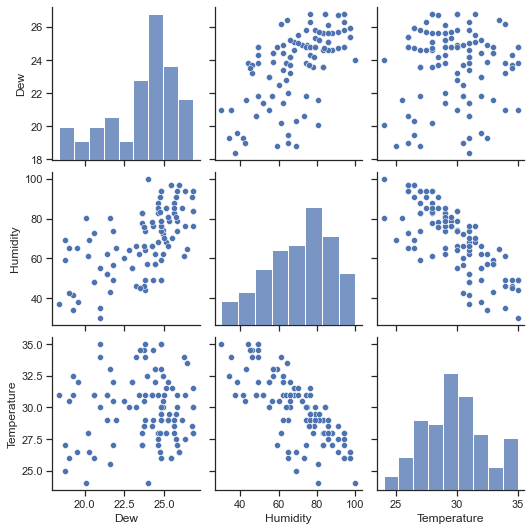

In [33]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(new_tphcm1)

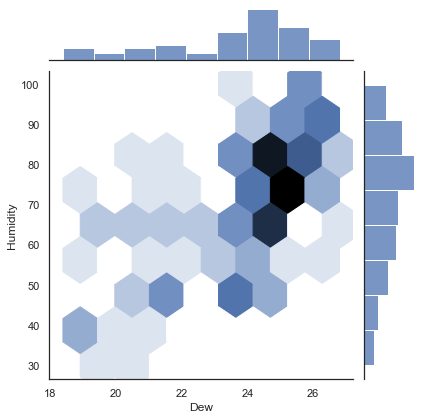

In [35]:
with sns.axes_style('white'):
    sns.jointplot("Dew", "Humidity",new_tphcm1, kind='hex')

E:\DA-App\setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


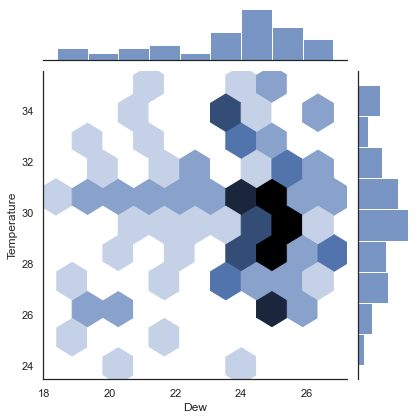

In [36]:
with sns.axes_style('white'):
    sns.jointplot("Dew", "Temperature",new_tphcm1, kind='hex')

In [37]:
new_tphcm['new_date'] = [d.date() for d in new_tphcm['DataTimeS']]
new_tphcm['new_time'] = [d.time() for d in new_tphcm['DataTimeS']]
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,DataTimeS,AlertLevel,new_date,new_time
0,102.0,23.6,83.0,1009.0,27.0,3.6,2021-01-21 19:00:00,Unhealthy for Sensitive Groups,2021-01-21,19:00:00
1,122.0,21.8,56.5,1008.5,30.5,2.5,2021-01-22 13:00:00,Unhealthy for Sensitive Groups,2021-01-22,13:00:00
2,114.0,21.8,49.0,1007.0,32.0,1.5,2021-01-23 15:00:00,Unhealthy for Sensitive Groups,2021-01-23,15:00:00
3,80.0,21.8,74.0,1009.0,27.0,4.1,2021-01-25 19:00:00,Moderate,2021-01-25,19:00:00
4,137.0,23.4,62.0,1007.0,31.0,5.1,2021-01-26 16:00:00,Unhealthy for Sensitive Groups,2021-01-26,16:00:00
...,...,...,...,...,...,...,...,...,...,...
107,97.0,24.2,66.0,1010.0,31.0,2.8,2021-11-10 10:00:00,Moderate,2021-11-10,10:00:00
108,65.0,24.2,66.0,1008.5,31.0,3.6,2021-11-16 12:00:00,Moderate,2021-11-16,12:00:00
109,114.0,24.8,79.0,1009.0,29.0,1.5,2021-11-20 09:00:00,Unhealthy for Sensitive Groups,2021-11-20,09:00:00
110,89.0,20.3,69.0,1011.0,26.5,3.0,2021-11-26 09:00:00,Moderate,2021-11-26,09:00:00


In [38]:
new_tphcm.set_index('DataTimeS', inplace=True)
new_tphcm.head()

,AQI,Dew,Humidity,Pressure,Temperature,Wind,AlertLevel,new_date,new_time
DataTimeS,,,,,,,,,
2021-01-21 19:00:00,102.0,23.6,83.0,1009.0,27.0,3.6,Unhealthy for Sensitive Groups,2021-01-21,19:00:00
2021-01-22 13:00:00,122.0,21.8,56.5,1008.5,30.5,2.5,Unhealthy for Sensitive Groups,2021-01-22,13:00:00
2021-01-23 15:00:00,114.0,21.8,49.0,1007.0,32.0,1.5,Unhealthy for Sensitive Groups,2021-01-23,15:00:00
2021-01-25 19:00:00,80.0,21.8,74.0,1009.0,27.0,4.1,Moderate,2021-01-25,19:00:00
2021-01-26 16:00:00,137.0,23.4,62.0,1007.0,31.0,5.1,Unhealthy for Sensitive Groups,2021-01-26,16:00:00


In [39]:
filt = new_tphcm['AQI'] < 10
new_tphcm.loc[filt,['AQI','Temperature','Humidity','Dew']]

,AQI,Temperature,Humidity,Dew
DataTimeS,,,,
2021-11-04 04:00:00,9.0,28.5,76.0,23.7


In [40]:
new_tphcm = new_tphcm.astype({'new_time':'string'})
new_tphcm['new_time'].dtype


string[python]

In [41]:
# lọc theo giờ 
filterday = new_tphcm.loc[(new_tphcm['new_time'] == '04:00:00') ]
filterday

,AQI,Dew,Humidity,Pressure,Temperature,Wind,AlertLevel,new_date,new_time
DataTimeS,,,,,,,,,
2021-11-04 04:00:00,9.0,23.7,76.0,1010.5,28.5,2.0,good,2021-11-04,04:00:00


In [42]:
filter16 = new_tphcm.loc[(new_tphcm['new_time'] == '16:00:00') ]
filter16

,AQI,Dew,Humidity,Pressure,Temperature,Wind,AlertLevel,new_date,new_time
DataTimeS,,,,,,,,,
2021-01-26 16:00:00,137.0,23.4,62.0,1007.0,31.0,5.1,Unhealthy for Sensitive Groups,2021-01-26,16:00:00
2021-06-26 16:00:00,50.0,25.2,66.0,1008.0,32.0,3.6,Moderate,2021-06-26,16:00:00
2021-10-08 16:00:00,17.0,24.8,76.5,1003.0,29.5,4.6,good,2021-10-08,16:00:00


In [43]:
new_tphcm.drop(index='2021-10-08 16:00:00',inplace=True)
new_tphcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,AlertLevel,new_date,new_time
DataTimeS,,,,,,,,,
2021-01-21 19:00:00,102.0,23.6,83.0,1009.0,27.0,3.6,Unhealthy for Sensitive Groups,2021-01-21,19:00:00
2021-01-22 13:00:00,122.0,21.8,56.5,1008.5,30.5,2.5,Unhealthy for Sensitive Groups,2021-01-22,13:00:00
2021-01-23 15:00:00,114.0,21.8,49.0,1007.0,32.0,1.5,Unhealthy for Sensitive Groups,2021-01-23,15:00:00
2021-01-25 19:00:00,80.0,21.8,74.0,1009.0,27.0,4.1,Moderate,2021-01-25,19:00:00
2021-01-26 16:00:00,137.0,23.4,62.0,1007.0,31.0,5.1,Unhealthy for Sensitive Groups,2021-01-26,16:00:00
...,...,...,...,...,...,...,...,...,...
2021-11-10 10:00:00,97.0,24.2,66.0,1010.0,31.0,2.8,Moderate,2021-11-10,10:00:00
2021-11-16 12:00:00,65.0,24.2,66.0,1008.5,31.0,3.6,Moderate,2021-11-16,12:00:00
2021-11-20 09:00:00,114.0,24.8,79.0,1009.0,29.0,1.5,Unhealthy for Sensitive Groups,2021-11-20,09:00:00


In [44]:
hcm = new_tphcm.loc[(new_tphcm['new_time'] != '04:00:00' )]
hcm

,AQI,Dew,Humidity,Pressure,Temperature,Wind,AlertLevel,new_date,new_time
DataTimeS,,,,,,,,,
2021-01-21 19:00:00,102.0,23.6,83.0,1009.0,27.0,3.6,Unhealthy for Sensitive Groups,2021-01-21,19:00:00
2021-01-22 13:00:00,122.0,21.8,56.5,1008.5,30.5,2.5,Unhealthy for Sensitive Groups,2021-01-22,13:00:00
2021-01-23 15:00:00,114.0,21.8,49.0,1007.0,32.0,1.5,Unhealthy for Sensitive Groups,2021-01-23,15:00:00
2021-01-25 19:00:00,80.0,21.8,74.0,1009.0,27.0,4.1,Moderate,2021-01-25,19:00:00
2021-01-26 16:00:00,137.0,23.4,62.0,1007.0,31.0,5.1,Unhealthy for Sensitive Groups,2021-01-26,16:00:00
...,...,...,...,...,...,...,...,...,...
2021-11-10 10:00:00,97.0,24.2,66.0,1010.0,31.0,2.8,Moderate,2021-11-10,10:00:00
2021-11-16 12:00:00,65.0,24.2,66.0,1008.5,31.0,3.6,Moderate,2021-11-16,12:00:00
2021-11-20 09:00:00,114.0,24.8,79.0,1009.0,29.0,1.5,Unhealthy for Sensitive Groups,2021-11-20,09:00:00


In [45]:
hcm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2021-01-21 19:00:00 to 2021-11-29 14:00:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AQI          110 non-null    float64
 1   Dew          110 non-null    float64
 2   Humidity     110 non-null    float64
 3   Pressure     110 non-null    float64
 4   Temperature  110 non-null    float64
 5   Wind         110 non-null    float64
 6   AlertLevel   110 non-null    object 
 7   new_date     110 non-null    object 
 8   new_time     110 non-null    string 
dtypes: float64(6), object(2), string(1)
memory usage: 8.6+ KB


In [46]:
hcm1 = hcm.groupby(hcm.index.floor('D')).mean()
hcm1['AQI'].describe()

count    108.000000
mean      69.550926
std       27.345226
min       21.000000
25%       50.000000
50%       66.250000
75%       82.750000
max      156.000000
Name: AQI, dtype: float64

**VISUALIZATION**

<AxesSubplot:xlabel='DataTimeS'>

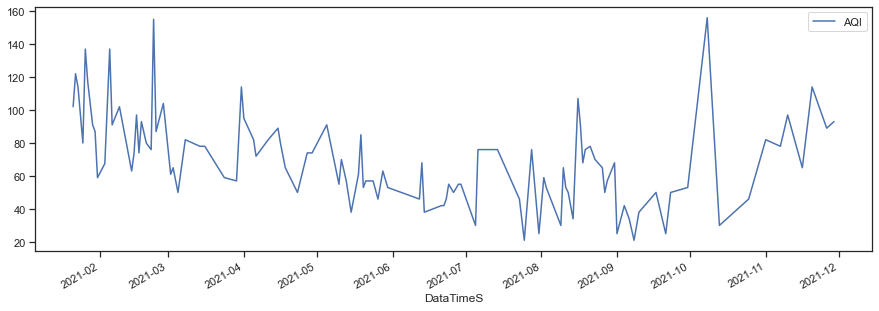

In [47]:
hcm[['AQI']].resample('1D').mean().dropna().plot(figsize=(15,5), kind='line')

<AxesSubplot:xlabel='DataTimeS'>

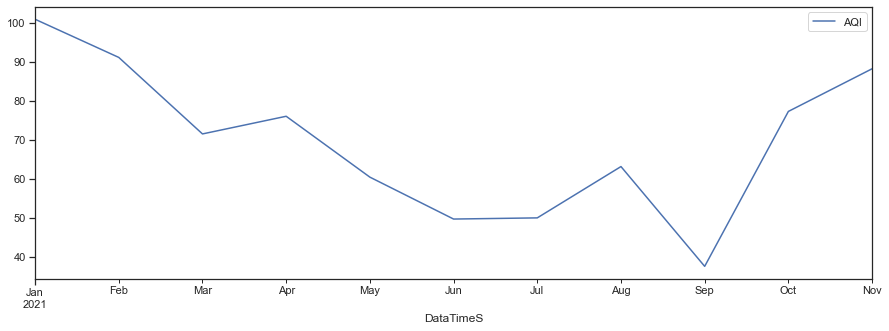

In [48]:
hcm[['AQI']].resample('1M').mean().dropna().plot(figsize=(15,5), kind='line')

<AxesSubplot:xlabel='DataTimeS', ylabel='AQI'>

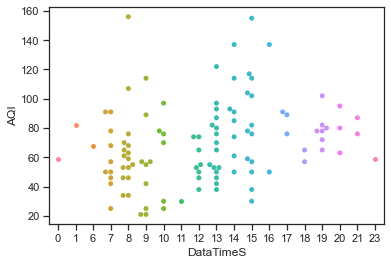

In [49]:
# AQI theo giờ
sns.swarmplot(data=hcm, x=hcm.index.hour, y='AQI')

In [50]:
%matplotlib inline
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.sans-serif'] = 'Open Sans'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#4c4c4c'
plt.rcParams['axes.labelcolor']= '#4c4c4c'
plt.rcParams['xtick.color'] = '#4c4c4c'
plt.rcParams['ytick.color'] = '#4c4c4c'
plt.rcParams['font.size']=12

In [51]:
colors = ['purple',  'red', 'orange', 'yellow', 'green']
orders = ['Rất không lành mạnh', 'Không lành mạnh', 'Không lành mạnh với nhóm nhạy cảm', 'Trung Bình', 'Tốt']
colormap = dict(zip(orders, colors))
colormap

{'Rất không lành mạnh': 'purple',
 'Không lành mạnh': 'red',
 'Không lành mạnh với nhóm nhạy cảm': 'orange',
 'Trung Bình': 'yellow',
 'Tốt': 'green'}

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Open Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Open Sans


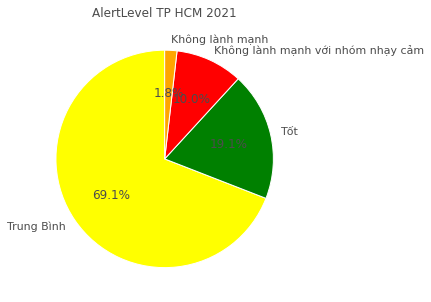

In [52]:
for_pie=hcm['AlertLevel'].value_counts()
plt.pie(for_pie, 
        labels=['Trung Bình', 'Tốt','Không lành mạnh với nhóm nhạy cảm','Không lành mạnh'],
        colors=['yellow', 'green', 'red', 'orange', 'purple'], autopct='%1.1f%%',startangle=90);
plt.title('AlertLevel TP HCM 2021');


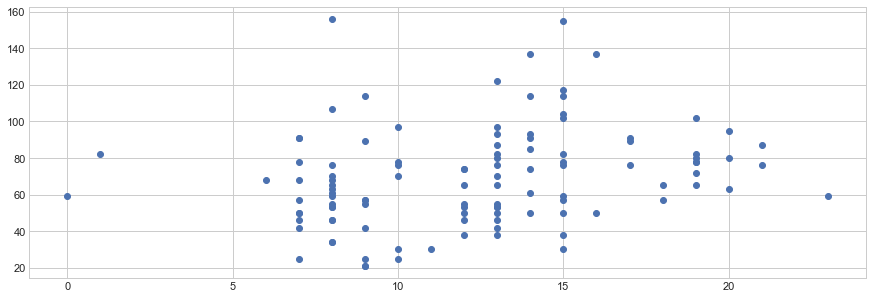

In [53]:
# plt.scatter(new_tphcm.index.hour, new_tphcm.AQI);
# new_tphcm['h'] = new_tphcm.index.hour
# new_tphcm['m'] = new_tphcm.index.month
#plt.scatter(new_tphcm.index.hour, new_tphcm.AQI);
# AQI theo ngày
plt.style.use('seaborn-whitegrid')
plt.scatter(hcm.index.hour, hcm.AQI);

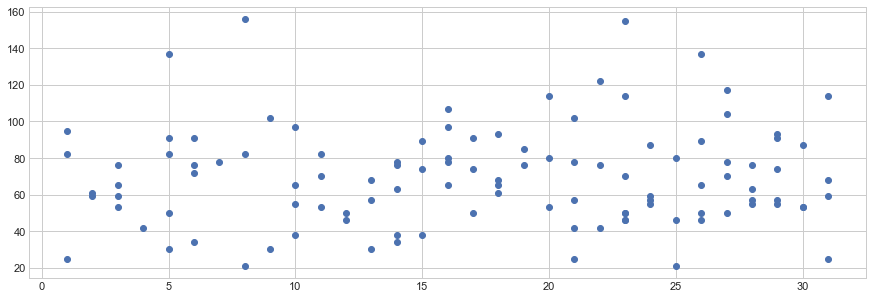

In [54]:
# AQI theo ngày
plt.style.use('seaborn-whitegrid')
plt.scatter(hcm.index.day, hcm.AQI);

**Correlation AQI**

In [55]:
# https://reader.elsevier.com/reader/sd/pii/S0160412019323323?token=859D4C1B401BE42D2BAC238E5C460525E1726BF703FCE46BBEDC448F241F1EA8A5022B7D93FE548400741B3CA42466BF&originRegion=us-east-1&originCreation=20221216134738

In [56]:
hcm.corr()

,AQI,Dew,Humidity,Pressure,Temperature,Wind
AQI,1.000000,-0.384137,-0.305495,-0.034064,0.073750,-0.145063
Dew,-0.384137,1.000000,0.624848,-0.297929,0.026225,0.035722
Humidity,-0.305495,0.624848,1.000000,0.086600,-0.764091,-0.088125
Pressure,-0.034064,-0.297929,0.086600,1.000000,-0.357052,-0.360370
Temperature,0.073750,0.026225,-0.764091,-0.357052,1.000000,0.142350
Wind,-0.145063,0.035722,-0.088125,-0.360370,0.142350,1.000000


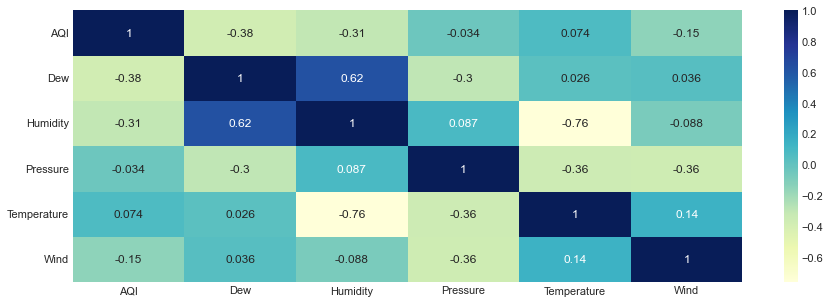

In [57]:
plot = sns.heatmap(hcm.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:>

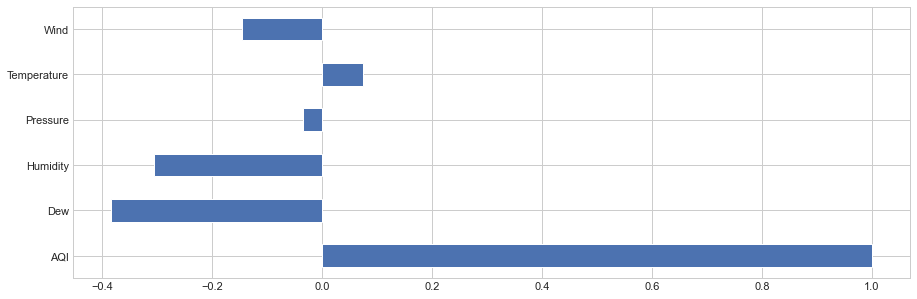

In [58]:
hcm.corr()['AQI'].plot.barh()

<AxesSubplot:>

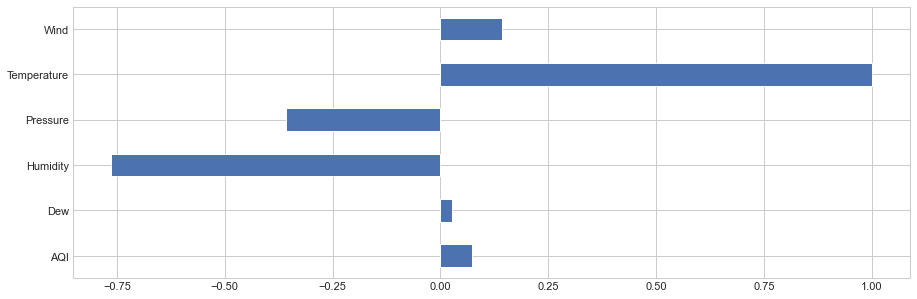

In [59]:
hcm.corr()['Temperature'].plot.barh()


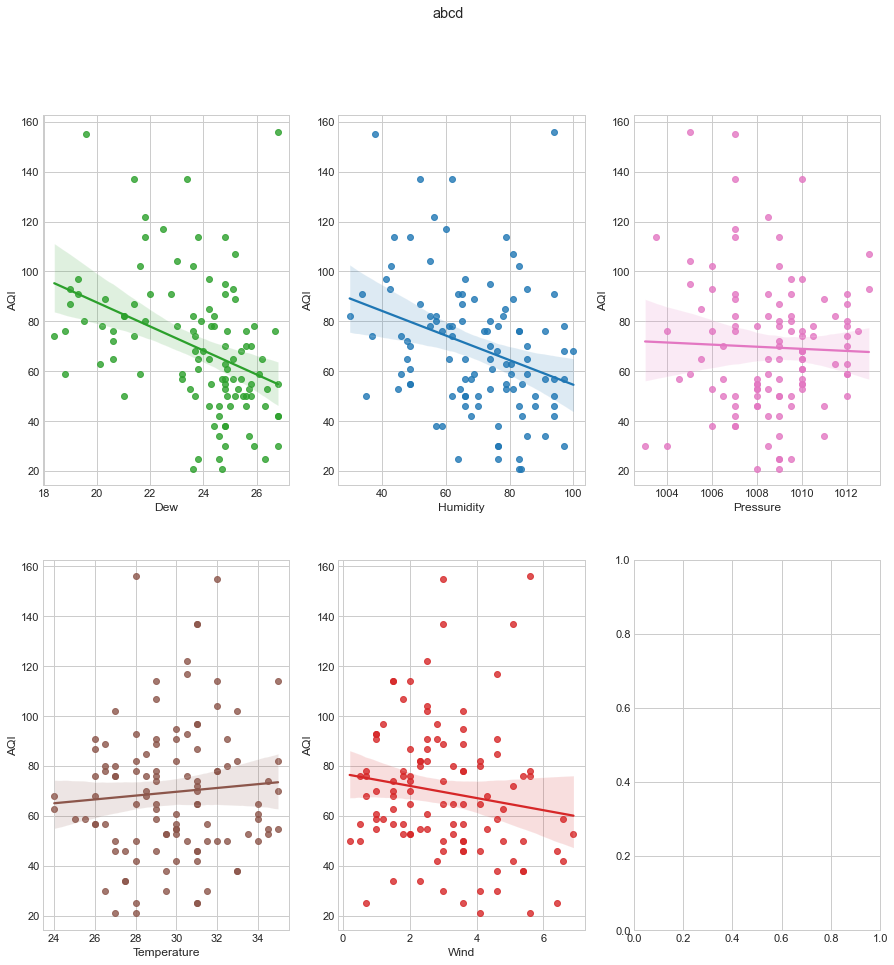

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
fig.suptitle('abcd')
sns.regplot(x=hcm['Dew'], y=hcm['AQI'], ax=axes[0,0], color='tab:green');
sns.regplot(x=hcm['Humidity'], y=hcm['AQI'], ax=axes[0,1], color='tab:blue');
sns.regplot(x=hcm['Pressure'], y=hcm['AQI'], ax=axes[0,2], color='tab:pink');
sns.regplot(x=hcm['Temperature'], y=hcm['AQI'], ax=axes[1,0], color='tab:brown');
sns.regplot(x=hcm['Wind'], y=hcm['AQI'], ax=axes[1,1],color='tab:red');

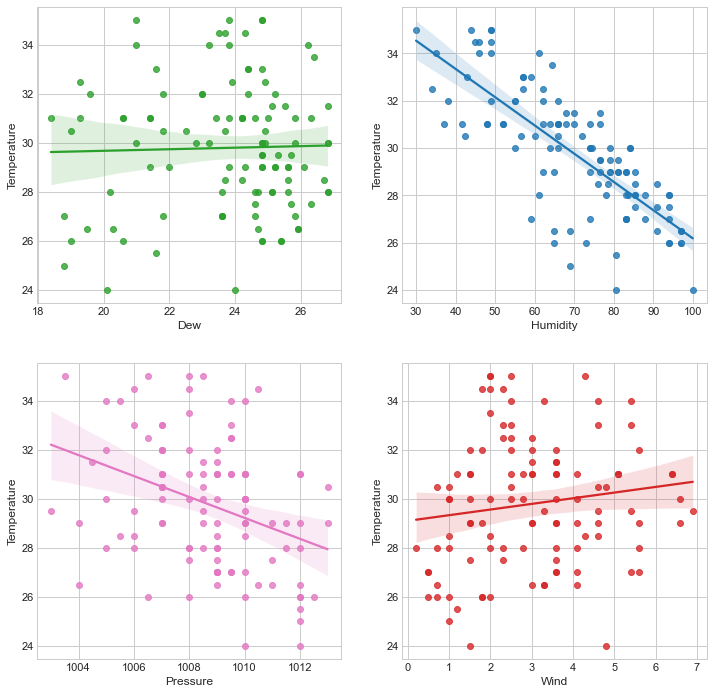

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
sns.regplot(x=hcm['Dew'], y=hcm['Temperature'], ax=axes[0,0], color='tab:green');
sns.regplot(x=hcm['Humidity'], y=hcm['Temperature'], ax=axes[0,1], color='tab:blue');
sns.regplot(x=hcm['Pressure'], y=hcm['Temperature'], ax=axes[1,0], color='tab:pink');
sns.regplot(x=hcm['Wind'], y=hcm['Temperature'], ax=axes[1,1],color='tab:red');

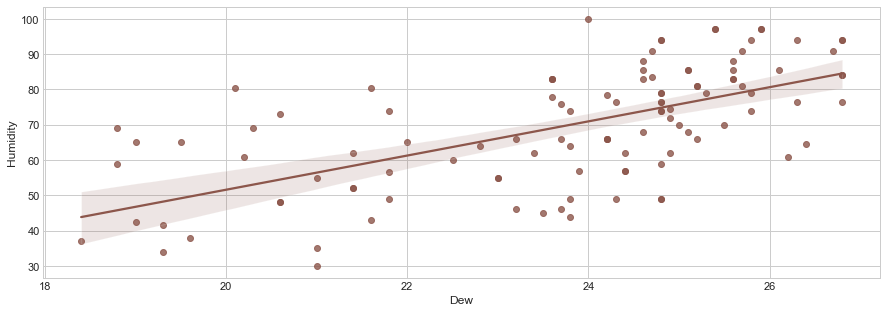

In [62]:
sns.regplot(x=hcm['Dew'], y=hcm['Humidity'], color='tab:brown');